# **Model Building and Evaluation**
By now, you must have learned how to clean and process data/feature set. In this tutorial, we will learn different types of algorithms and the metrics for evaluating their performance.

Adapted from Wafiq Syed 2020 [How to use Scikit-Learn Datasets for Machine Learning](https://towardsdatascience.com/how-to-use-scikit-learn-datasets-for-machine-learning-d6493b38eca3) and Dipanjan Sarkar et al. 2018. [Practical Machine Learning with Python](https://link.springer.com/book/10.1007/978-1-4842-3207-1).

In [1]:
# imports necessary libraries
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

# sets the backend of matplotlib to the 'inline' backend: With this backend, 
# the output of plotting commands is displayed inline within frontends like 
# the Jupyter notebook, directly below the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document.
%matplotlib inline

## Classification Example

In this example, we’ll be working with the “Breast Cancer Wisconsin” dataset. We will import the data and understand how to read it. We will also build a simple ML model that is able to classify cancer scans either as malignant or benign.

###Import “Breast Cancer Wisconsin” dataaset

The dataset can be found in *sklearn.datasets*. Each dataset has a corresponding function used to load the dataset. These functions follow the same format: "load_DATASET()", where DATASET refers to the name of the dataset.

In [2]:
from sklearn import datasets
bc = datasets.load_breast_cancer()

These load functions (such as *load_breast_cancer()*) don't return data in the tabular format, they return a **Bunch** object, a Scikit-Learn's fancy name for a Dictionary.

Let's looking into its keys.

In [3]:
print(bc.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


We can get the following keys:

* **data** is all the feature data (the attributes of the scan that help us identify if the tumor is malignant or benign, such as radius, area, etc.) in a NumPy array
* **target** is the target data (the variable you want to predict, in this case whether the tumor is malignant or benign) in a NumPy array,
* **feature_names** are the names of the feature variables, in other words names of the columns in data
* **target_names** is the name(s) of the target variable(s), in other words name(s) of the target column(s)
* **DESCR**, short for DESCRIPTION, is a description of the dataset
* **filename** is the path to the actual file of the data in CSV format.
* **data_module** is the name of the data module from where the data is being loaded.

It’s important to note that all of Scikit-Learn datasets are divided into data and target. data represents the features, which are the variables that help the model learn how to predict. target includes the actual labels. In our case, the target data is one column classifies the tumor as either 0 indicating malignant or 1 for benign.

Let's take a look the description of the dataset

In [4]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

###Working with the Dataset

We can use *pandas* to explore the dataset.

In [5]:
# Import pandas
import pandas as pd
# Read the DataFrame, first using the feature data
df = pd.DataFrame(bc.data, columns=bc.feature_names)
# Add a target column, and fill it with the target data
df['target'] = bc.target
# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


To see the value of this dataset, run

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

There are a few things to observe:

* There aren’t any missing values, all the columns have 569 values. This saves us time from having to account for missing values.
* All the data types are numerical. This is important because Scikit-Learn models do not accept categorical variables. In the real world, when we get categorical variables, we transform them into numerical variables. Scikit-Learn’s datasets are free of categorical variables.

Hence, Scikit-Learn takes care of the data cleansing work. Their datasets are extremely valuable. You will benefit from learning ML by using them.

###Let's do some AI

Let’s build a model that classifies cancer tumors as malignant (spreading) or benign (non-spreading). This will show you how to use the data for your own models. We’ll build a simple K-Nearest Neighbors model.

First, let’s split the dataset into two, one for training the model — giving it data to learn from, and the second for testing the model — seeing how well the model performs on data (scans) it hasn’t seen before.

In [7]:
# Store the feature data
X = bc.data
# store the target data
y = bc.target
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

This gives us two datasets —one for training and one for testing. Let’s get onto training the model.



In [8]:
from sklearn.neighbors import KNeighborsClassifier
# Classifier implementing the k-nearest neighbors vote.
logreg = KNeighborsClassifier(n_neighbors=6)
# Fit the k-nearest neighbors classifier from the training dataset.
logreg.fit(X_train, y_train)
# Return the mean accuracy on the given test data and labels.
print("Model accurcy: ", logreg.score(X_test, y_test))

Model accurcy:  0.9090909090909091


## Clustering Example

In this example, we will learn how we can fit a clustering model on “Breast Cancer Wisconsin” dataset. We will use a labeled dataset to help us see the results of the clustering model and compare it with actual labels. A point to remember here is that, usually labeled data is not available in the real world,
which is why we choose to go for unsupervised methods like clustering. We will try to cover two different
algorithms, one each from partitioning based clustering and hierarchical clustering.

In [9]:
# Load Wisconsin Breast Cancer Dataset
import numpy as np
from sklearn.datasets import load_breast_cancer

# load data
bc = load_breast_cancer()
# Store the feature data
X = bc.data
# store the target data
y = bc.target
print(X.shape, bc.feature_names)

(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


It is evident that we have a total of 569 observations and 30 attributes or features for each observation.

### Partition based Clustering Example

We will choose the simplest yet most popular partition based clustering model for our example, which
is **K-means** algorithm. This algorithm is a centroid based clustering algorithm, which starts with some
assumption about the total clusters in the data and with random centers assigned to each of the clusters.
It then reassigns each data point to the center closest to it, using Euclidean distance as the distance metric.
After each reassignment, it recalculates the center of that cluster. The whole process is repeated iteratively
and stopped when reassignment of data points doesn’t change the cluster centers. Variants include
algorithms like **K-medoids**.

In [10]:
# determine these two clusters (either 0 or 1) from the data by K-means clustering
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=2)
km.fit(X)

labels = km.labels_
centers = km.cluster_centers_
# labels of the first 10 data points
print(labels[:10])
# numerical value of the dimensions of the data
# (the 30 attributes in the dataset) around which data is clustered.
print(centers)

[0 0 0 1 0 1 0 1 1 1]
[[1.93799237e+01 2.16945802e+01 1.28231298e+02 1.18592977e+03
  1.01294580e-01 1.48612977e-01 1.76939466e-01 1.00698779e-01
  1.91539695e-01 6.06029008e-02 7.42803817e-01 1.22253817e+00
  5.25058015e+00 9.56781679e+01 6.59868702e-03 3.21766947e-02
  4.24197710e-02 1.56739847e-02 2.03039695e-02 3.95338931e-03
  2.37094656e+01 2.89126718e+01 1.58496183e+02 1.75302290e+03
  1.40424733e-01 3.57757710e-01 4.49306107e-01 1.92431069e-01
  3.11881679e-01 8.61654962e-02]
 [1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922e+01 7.17326256e-03 2.34746895e-02
  2.87455128e-02 1.06363242e-02 2.06135799e-02 3.74750297e-03
  1.40439018e+01 2.47095434e+01 9.19375114e+01 6.19647945e+02
  1.29959110e-01 2.23311758e-01 2.19214947e-01 9.13298425e-02
  2.83553653e-01 8.32819406e-02]]


In [11]:
# we will leverage PCA to reduce the input dimensions (30) to two principal components
# and visualize the clusters on top of the same.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X)

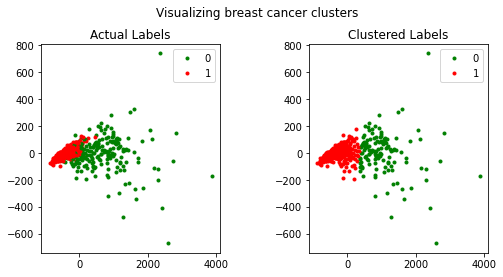

In [12]:
# visualize the clusters on the reduced 2D feature space for the actual labels as
# well as the clustered output labels.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if labels[i] == 0:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if labels[i] == 1:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['0', '1'])

We can clearly see that the clustering has worked quite well and it shows distinct
separation between clusters with labels 0 and 1 and is quite similar to the actual labels. However we do
have some overlap where we have mislabeled some instances.

Remember in an actual real-world scenario, you will not have the actual labels to compare with and the
main idea is to find structures or patterns in your data in the form of these clusters. 
Hence even when dealing with labeled data and running clustering do not
compare clustered label values with actual labels and try to measure accuracy.

Another very important
point to remember is that cluster label values have no significance. The labels 0 and 1 are just values to
distinguish cluster data points from each other. 

Also another important note
is that if we had asked for more than two clusters, the algorithm would have readily supplied more clusters
but it would have been hard to interpret those and many of them would not make sense. Hence, one of
the caveats of using the K-means algorithm is to use it in the case where we have some idea about the total
number of clusters that may exist in the data.

### Hierarchical Clustering Example

We can use the same data to perform a hierarchical clustering and see if the results change much as
compared to K-means clustering and the actual labels. 

agglomerative clustering is hierarchical clustering using a
bottom up approach i.e. each observation starts in its own cluster and clusters are successively merged
together. The merging criteria can be used from a candidate set of linkages; the selection of linkage governs
the merge strategy. Some examples of linkage criteria are Ward, Complete linkage, Average linkage and so
on

In [13]:
# compute the linkage matrix using Ward’s minimum variance criterion.
from scipy.cluster.hierarchy import dendrogram, linkage

#Perform hierarchical/agglomerative clustering.
#Returns hierarchical clustering encoded as a linkage matrix.
Z = linkage(X, 'ward')
print(Z)

[[2.87000000e+02 3.36000000e+02 3.81596727e+00 2.00000000e+00]
 [1.06000000e+02 4.20000000e+02 4.11664267e+00 2.00000000e+00]
 [5.50000000e+01 2.51000000e+02 4.93361024e+00 2.00000000e+00]
 ...
 [1.13000000e+03 1.13200000e+03 6.19607483e+03 8.60000000e+01]
 [1.13100000e+03 1.13300000e+03 8.36899225e+03 4.83000000e+02]
 [1.13400000e+03 1.13500000e+03 1.83711029e+04 5.69000000e+02]]


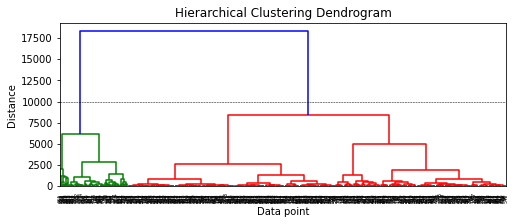

In [14]:
# use a dendrogram to visualize the distance-based merges
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
# Plot the hierarchical clustering as a dendrogram.
dendrogram(Z)
# y: position in data coordinates of the horizontal line.
# c: line color, 'k' as black
# ls: line style
# lw: line weight
plt.axhline(y=10000, c='k', ls='--', lw=0.5)
plt.show()

In [15]:
# Get the cluster labels
from scipy.cluster.hierarchy import fcluster

max_dist = 10000

# Form flat clusters from the hierarchical clustering defined by
# the given linkage matrix
hc_labels = fcluster(Z, max_dist, criterion='distance')

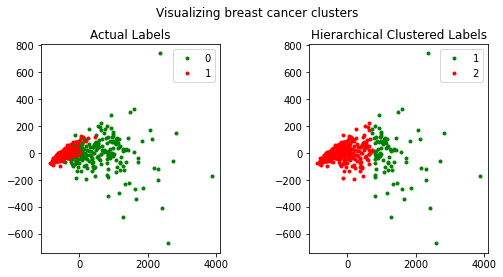

In [16]:
# Let’s compare how the cluster outputs look based on the PCA reduced dimensions as 
# compared to the original label distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Hierarchical Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if hc_labels[i] == 1:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if hc_labels[i] == 2:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['1', '2'])

We definitely see two distinct clusters but there is more overlap as compared to the K-means method
between the two clusters and we have more mislabeled instances. However, do take a note of the label
numbers; here we have 1 and 2 as the label values. This is just to reinforce the fact that the label values are
just to distinguish the clusters and don’t mean anything. The advantage of this method is that you do not
need to input the number of clusters beforehand and the model tries to find it from the underlying data.

## Classification Model Evaluation Metrics

In [17]:
# let’s first prepare train and test datasets to build our classification models.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [18]:
# let’s build a logistic regression model on our breast cancer dataset
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

### Confusion Matrix

In [19]:
import pandas as pd

# Display the confusion matrix for the model predictions on the test dataset.
def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                codes=level_labels)) 
    print(cm_frame) 
    

# predict on test data and view confusion matrix
y_pred = logistic.predict(X_test)
display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred, classes=[0, 1])


          Predicted:     
                   0    1
Actual: 0         59    4
        1          1  107


We can see that out of
60 observations with label 0 (malignant), our model has correctly predicted 59 observations. Similarly out of
111 observations with label 1 (benign), our model has correctly predicted 107 observations

### True Positive, False Positive, True Negative and False Negative

In [20]:
# Set positive class label
positive_class = 1
# True Positive (TP): This is the count of the total number of instances from the
#positive class where the true class label was equal to the predicted class label.
TP = 107

# False Positive (FP): This is the count of the total number of instances from the
#negative class where our model misclassified them by predicting them as positive.
FP = 4

# True Negative (FN): This is the count of the total number of instances from the
# negative class where the true class label was equal to the predicted class label.
TN = 59

# False Negative (FN): This is the count of the total number of instances from the
# positive class where our model misclassified them by predicting them as negative.
FN = 1

### Accuracy

This is one of the most popular measures of classifier performance. It is defined as the overall
accuracy or proportion of correct predictions of the model. The formula for computing accuracy from the
confusion matrix is:

$Accurcy=\frac{TP+TN}{TP+FP+TN+FN}$

In [21]:
fw_acc = round(metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)
print('Framework Accuracy:', fw_acc)
print('Manually Computed Accuracy:', mc_acc)

Framework Accuracy: 0.97076
Manually Computed Accuracy: 0.97076


### Precision

Precision, also known as positive predictive value, is another metric that can be derived from
the confusion matrix. It is defined as the number of predictions made that are actually correct or relevant out
of all the predictions based on the positive class. The formula for precision is as follows:

$Precision=\frac{TP}{TP+FP}$

A model with high precision will identify a higher fraction of positive class as compared to a model
with a lower precision. Precision becomes important in cases where we are more concerned about finding
the maximum number of positive class even if the total accuracy reduces.

In [22]:
fw_prec = round(metrics.precision_score(y_true=y_test, y_pred=y_pred), 5)
mc_prec = round((TP) / (TP + FP), 5)
print('Framework Precision:', fw_prec)
print('Manually Computed Precision:', mc_prec)

Framework Precision: 0.96396
Manually Computed Precision: 0.96396


### Recall

Recall, also known as sensitivity, is a measure of a model to identify the percentage of relevant
data points. It is defined as the number of instances of the positive class that were correctly predicted. This is
also known as hit rate, coverage, or sensitivity. The formula for recall is:

$Recall=\frac{TP}{TP+FN}$

Recall becomes an important measure of classifier performance in scenarios where we want to catch
the most number of instances of a particular class even when it increases our false positives. For example,
consider the case of bank fraud, a model with high recall will give us higher number of potential fraud cases.
But it will also help us raise alarm for most of the suspicious cases.

In [23]:
fw_rec = round(metrics.recall_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FN), 5)
print('Framework Recall:', fw_rec)
print('Manually Computed Recall:', mc_rec)

Framework Recall: 0.99074
Manually Computed Recall: 0.99074


### F1-Score

There are some cases in which we want a balanced optimization of both precision and recall.
F1 score is a metric that is the harmonic mean of precision and recall and helps us optimize a classifier for
balanced precision and recall performance.
The formula for the F1 score is:

$F1 Score = \frac{2 x Precision x Recall}{Precision + Recall}$

In [24]:
fw_f1 = round(metrics.f1_score(y_true=y_test, y_pred=y_pred), 5)
mc_f1 = round((2*mc_prec*mc_rec) / (mc_prec+mc_rec), 5)
print('Framework F1-Score:', fw_f1)
print('Manually Computed F1-Score:', mc_f1)

Framework F1-Score: 0.97717
Manually Computed F1-Score: 0.97717


### Receiver Operating Characteristic (ROC) Curve

The ROC curve can be created by plotting the fraction of true positives versus the fraction of false
positives, i.e. it is a plot of True Positive Rate (TPR) versus the False Positive Rate (FPR). It is applicable
mostly for scoring classifiers. Scoring classifiers are the type of classifiers which will return a probability
value or score for each class label, from which a class label can be deduced (based on maximum probability
value).

This curve can be plotted using the true positive rate (TPR) and the false positive rate (FPR) of a
classifier. TPR is known as sensitivity or recall, which is the total number of correct positive results, predicted
among all the positive samples the dataset. FPR is known as false alarms or (1 - specificity), determining the
total number of incorrect positive predictions among all negative samples in the dataset.

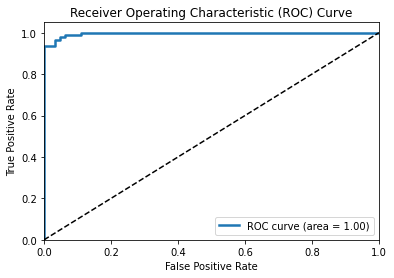

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 

def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)

Ideally, the best prediction model would give a point
on the top left corner (0, 1) indicating perfect classification (100% sensitivity & specificity). A diagonal line
depicts a classifier that does a random guess. Ideally if your ROC curve occurs in the top half of the graph,
you have a decent classifier which is better than average. The plot above shows a near perfect ROC curve.

## Clustering Model Evaluation Metrics

The lack of a validated ground truth, i.e. the abscence of true labels in the data makes the  evaluation of clustering (or unsupervised models in general) very difficult.



### Build two clustering models on the breast cancer dataset

We will leverage the breast cancer
dataset available in the variables X for the data and y for the observation labels. We will also use the K-means
algorithm to fit two models on this data—one with two clusters and the second one with five clusters—and
then evaluate their performance.

In [26]:
km2 = KMeans(n_clusters=2, random_state=42).fit(X)
km2_labels = km2.labels_

km5 = KMeans(n_clusters=5, random_state=42).fit(X)
km5_labels = km5.labels_

### External validation

External validation means validating the clustering model when we have some ground truth available
as labeled data. The presence of external labels reduces most of the complexity of model evaluation as
the clustering (unsupervised) model can be validated in similar fashion to classification models.

Three popular metrics can be used in this scenario:

* **Homogeneity**: A clustering model prediction result satisfies homogeneity if all of
its clusters contain only data points that are members of a single class (based on the
true class labels).
* **Completeness**: A clustering model prediction result satisfies completeness if
all the data points of a specific ground truth class label are also elements of the
same cluster.
* **V-measure**: The harmonic mean of homogeneity and completeness scores gives us
the V-measure value.

Values are typically bounded between 0 and 1 and usually higher values are better. Let’s compute these
metric on our two K-means clustering models.

In [27]:
km2_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km2_labels), 3)
km5_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km5_labels), 3)

print('Homogeneity, Completeness, V-measure metrics for num clusters=2: ', km2_hcv)
print('Homogeneity, Completeness, V-measure metrics for num clusters=5: ', km5_hcv)

Homogeneity, Completeness, V-measure metrics for num clusters=2:  [0.422 0.517 0.465]
Homogeneity, Completeness, V-measure metrics for num clusters=5:  [0.602 0.298 0.398]


We can see that the V-measure for the first model with two clusters is better than the one with five
clusters and the reason is because of higher completeness score.

### Internal validation

Internal validation means validating a clustering model by defining metrics that capture the expected
behavior of a good clustering model. A good clustering model can be identified by two very desirable traits:
* Compact groups, i.e. the data points in one cluster occur close to each other.
* Well separated groups, i.e. two groups\clusters have as large distance among
them as possible.



####Silhouette Coefficient
Silhouette coefficient is a metric that tries to combine the two requirements of a good clustering model. The
silhouette coefficient is defined for each sample and is a combination of its similarity to the data points in its
own cluster and its dissimilarity to the data points not in its cluster.

The silhouette coefficient is usually bounded between -1 (incorrect clustering) and +1 (excellent quality
dense clusters). A higher value of silhouette coefficient generally means that the clustering model is leading
to clusters that are dense and well separated and distinguishable from each other. Lower scores indicate
overlapping clusters.

In [28]:
import sklearn.metrics

km2_silc = metrics.silhouette_score(X, km2_labels, metric='euclidean')
km5_silc = metrics.silhouette_score(X, km5_labels, metric='euclidean')

print('Silhouette Coefficient for num clusters=2: ', km2_silc)
print('Silhouette Coefficient for num clusters=5: ', km5_silc)

Silhouette Coefficient for num clusters=2:  0.6972646156059464
Silhouette Coefficient for num clusters=5:  0.5102292997907838


We can observe that from the metric results it seems like we have better
cluster quality with two clusters as compared to five clusters.

#### Calinski-Harabaz Index

The Calinski-Harabaz index is another metric that we can use to evaluate clustering models when the
ground truth is not known. The Calinski-Harabaz score is given as the ratio of the between-clusters
dispersion and the within-cluster dispersion.

A higher score normally indicates that the clusters are dense and well separated, which
relates to the general principles of clustering models.

In [29]:
km2_chi = metrics.calinski_harabasz_score(X, km2_labels)
km5_chi = metrics.calinski_harabasz_score(X, km5_labels)

print('Calinski-Harabaz Index for num clusters=2: ', km2_chi)
print('Calinski-Harabaz Index for num clusters=5: ', km5_chi)

Calinski-Harabaz Index for num clusters=2:  1300.2082268895424
Calinski-Harabaz Index for num clusters=5:  1621.0110530063253


We can see that both the scores are pretty high with the results for five clusters being even higher. This
goes to show that just relying on metric number alone is not sufficient and you must try multiple evaluation
methods coupled with feedback from data scientists as well as domain experts.